# Analysis of Generated Corpus

This notebook performs a quality check on the `large_corpus.txt` file generated by our script. The goal is to verify that the corpus exhibits properties of natural language before using it for further research.

**Analysis Steps:**
1.  **Load Corpus**: Read the generated text file.
2.  **Calculate Basic Statistics**: Compute total words and vocabulary size.
3.  **Analyze Frequency Distribution**: Calculate word frequencies and visualize them to check for properties like Zipf's Law.
4.  **Inspect Content**: Review the most and least frequent words as a sanity check.

In [ ]:
# Load and Analyze the Generated Corpus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os
import sys

# Add parent directory to Python path for imports
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import path utilities for cross-platform compatibility
try:
    from path_utils import get_project_path, get_output_path
    print("✅ Path utilities loaded successfully")
except ImportError:
    print("⚠️ Path utilities not found, using fallback functions")
    
    def get_project_path(relative_path):
        """Fallback path utility function"""
        if os.path.exists(relative_path):
            return relative_path
        parent_path = os.path.join('..', relative_path)
        if os.path.exists(parent_path):
            return parent_path
        return relative_path
    
    def get_output_path(filename):
        """Fallback output path utility function"""
        output_dir = get_project_path('output')
        os.makedirs(output_dir, exist_ok=True)
        return os.path.join(output_dir, filename)

# Load the generated corpus using path utilities
corpus_path = get_output_path('large_corpus.txt')

try:
    print(f"🔍 Loading corpus from: {corpus_path}")
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    
    print(f"✅ Corpus loaded successfully from '{corpus_path}'.")
    print(f"Total characters: {len(corpus_text):,}")
    
    # Basic text processing
    # Simple tokenization - split by whitespace and remove punctuation
    words = re.findall(r'\b[a-zA-Z]+\b', corpus_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")
    
except FileNotFoundError:
    print(f"❌ Error: Corpus file not found at {corpus_path}")
    print("Please make sure you've run the corpus generation script first.")
    words = []

✅ Libraries imported.
✅ Plotting configured.


## 1. Load Corpus and Calculate Basic Statistics
First, we load the `large_corpus.txt` file and perform basic text processing to calculate the total number of words (tokens) and the size of the vocabulary (unique words).

In [10]:
# Load the generated corpus
corpus_path = '../output/large_corpus.txt'
try:
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    print(f"✅ Corpus loaded successfully from '{corpus_path}'.")
except FileNotFoundError:
    print(f"❌ Error: '{corpus_path}' not found. Please ensure the generation script has been run.")
    corpus_text = ""

if corpus_text:
    # Remove metadata comments before processing
    # The DOTALL flag is crucial for multiline JSON
    cleaned_text = re.sub(r'<!-- Story Metadata:.*?-->', '', corpus_text, flags=re.DOTALL)
    
    # Tokenize the text into words using a simple regex
    # This finds sequences of word characters, converting to lowercase
    words = re.findall(r'\b\w+\b', cleaned_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")

✅ Corpus loaded successfully from '../output/large_corpus.txt'.

--- Corpus Statistics ---
Total Words (Tokens): 2,072,232
Vocabulary Size (Unique Words): 47,180
-------------------------

--- Corpus Statistics ---
Total Words (Tokens): 2,072,232
Vocabulary Size (Unique Words): 47,180
-------------------------


## 2. Calculate and Visualize Word Frequency Distribution (Zipf's Law)
A key characteristic of natural language is that the frequency of any word is inversely proportional to its rank in the frequency table. When plotted on a log-log scale, this relationship should appear as a straight line. This is known as Zipf's Law and serves as an excellent quality check for our generated corpus.

Plotting the frequency distribution...



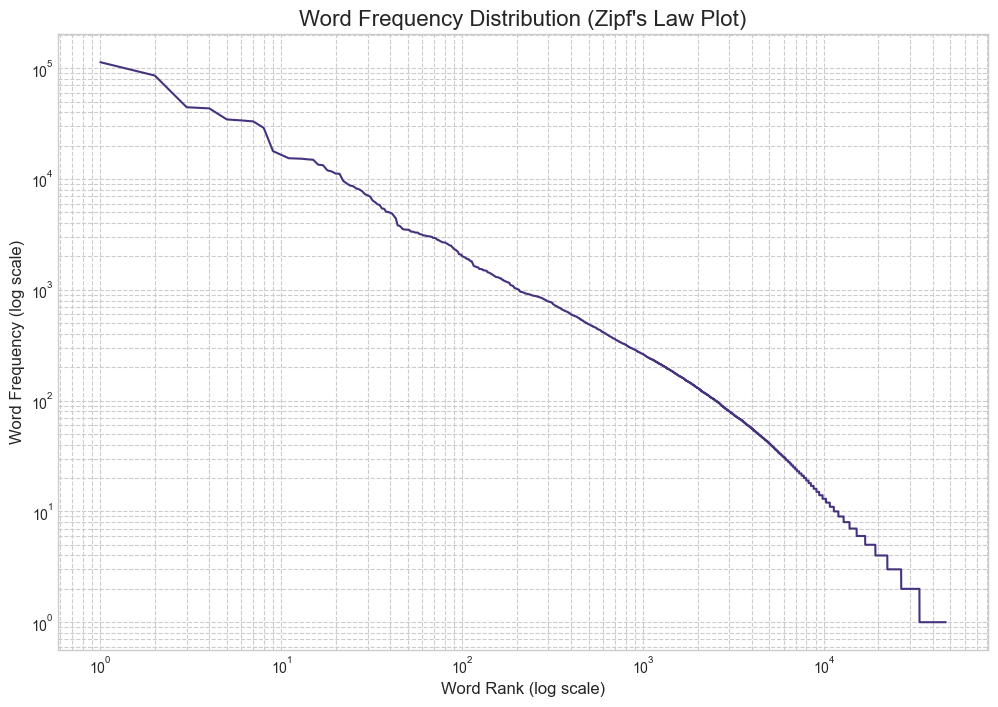

In [11]:
if 'words' in locals() and words:
    # Calculate word frequencies
    word_counts = Counter(words)
    
    # Get the frequencies and sort them in descending order
    frequencies = sorted(word_counts.values(), reverse=True)
    
    # Create ranks for the x-axis
    ranks = np.arange(1, len(frequencies) + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.loglog(ranks, frequencies)
    plt.title("Word Frequency Distribution (Zipf's Law Plot)", fontsize=16)
    plt.xlabel("Word Rank (log scale)", fontsize=12)
    plt.ylabel("Word Frequency (log scale)", fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    print("Plotting the frequency distribution...")
    plt.show()
else:
    print("⚠️ No words available to plot. Please run the previous cells.")

## 3. Inspect Most and Least Frequent Words
As a final sanity check, let's look at the most common and least common words. The most frequent should be common function words (e.g., 'the', 'a', 'is'). The least frequent words can give us an idea of the diversity and potential noise at the tail end of the distribution.

In [12]:
if 'word_counts' in locals():
    # Create a DataFrame for easier viewing
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    print("--- Top 20 Most Frequent Words ---")
    print(freq_df.head(20))
    print("\n" + "="*35 + "\n")
    
    # Words that appear only once
    single_occurrence_words = freq_df[freq_df['frequency'] == 1]
    
    print(f"--- {len(single_occurrence_words)} Words with a Single Occurrence (Hapax Legomena) ---")
    # Display a random sample if there are many
    if len(single_occurrence_words) > 20:
        print("(Showing a random sample of 20)")
        print(single_occurrence_words.sample(20))
    else:
        print(single_occurrence_words)
        
else:
    print("⚠️ Word counts not available. Please run previous cells.")


--- Top 20 Most Frequent Words ---
    word  frequency
0    the     113290
1      a      85845
2    and      44435
3     of      43403
4     to      34483
5     in      33797
6     it      33110
7      s      28923
8   like      17852
9   that      16529
10  with      15395
11   but      15303
12   not      15241
13     t      15046
14   you      14927
15    is      13476
16  your      13326
17    or      11962
18   for      11698
19  this      11184


--- 13470 Words with a Single Occurrence (Hapax Legomena) ---
(Showing a random sample of 20)
                   word  frequency
45325     echinocandins          1
44645      notarization          1
39769              stow          1
45512       shopkeepers          1
36058           ballast          1
44042           sidling          1
44252            captor          1
43003             dikes          1
39575         vitiating          1
36966         spaceport          1
40476               thc          1
43853        cafeterias      